# Ponto Flutuante

- Números são representados com **precisão finita**
- Representação é **binária**, então mesmo decimais exatos não são representados exatamente

Python (e `numpy`) usa por padrão precisão dupla (*double*), de 64 bits. Isto é suficiente pra grande maioria das aplicações. Isto não quer dizer que não podemos ter problemas!

## Comparações perigosas

Quando você escreve um número decimal como `0.1`, Python, e muitas outras linguagens vão mostrar esse número como "0.1", mas internamente a coisa não é tão simples, pois 0.1 não tem representação exata em binário.

In [1]:
x = 0.1
print(x)
print(f"{x:.10f}")
print(f"{x:.20f}")

0.1
0.1000000000
0.10000000000000000555


In [2]:
print(0.1 + 0.1 + 0.1 == 0.3)
print(0.5 + 0.5 + 0.5 == 1.5)

False
True


In [3]:
print(0.1 + 0.1 + 0.1 - 0.3)
print(0.5 + 0.5 + 0.5 - 1.5)

5.551115123125783e-17
0.0


## Comparações mais seguras

Faça a diferença e compare com uma certa tolerância:

In [4]:
tol = 1e-10
print(abs(0.1 + 0.1 + 0.1 - 0.3) < tol)

True


Ou arredonde os dois lados depois das operações:

In [5]:
print(round(0.1 + 0.1 + 0.1, 10) == round(0.3, 10))

True


## Olhando pontos flutuantes por dentro

O código abaixo converte um ponto flutuante na sua representação interna. Rode (e modifique) os exemplos pra ver o que acontece.

In [6]:
from struct import pack

def binary(num: float) -> str:
    return "".join("{:0>8b}".format(c) for c in pack("!d", num))
    

def print_binary(num: float) -> None:
    bin = binary(num)
    signal = bin[0]
    power = bin[1:12]
    mantissa = bin[13:]
    print(signal, power, mantissa)

Estas funções são usadas para converter um número de ponto flutuante em sua representação binária IEEE 754 e imprimi-la de forma formatada.

1. O módulo `struct` do Python fornece funções para interpretar bytes. Ele é usado aqui para converter um número de ponto flutuante em sua representação binária.

2. `binary()` recebe um número de ponto flutuante como entrada e retorna sua representação binária IEEE 754 como uma string.

    - A função `struct.pack()` empacota o número de ponto flutuante em uma string de bytes de acordo com o formato `!d`, onde `!` indica a ordem dos bytes na rede (big-endian) e `d` indica um número de ponto flutuante de dupla precisão.
    - `'{:0>8b}'.format(c) for c in struct.pack('!d', num)`: esta parte itera sobre cada byte na representação empacotada e converte-o para sua representação binária, preenchida com zeros até 8 bits.

3. `print_binary()` imprime a representação binária do número de ponto flutuante de forma formatada.

Algumas potências de 2:

In [7]:
print_binary(0.5)
print_binary(1.0)
print_binary(2.0)
print_binary(-2.0)

0 01111111110 000000000000000000000000000000000000000000000000000
0 01111111111 000000000000000000000000000000000000000000000000000
0 10000000000 000000000000000000000000000000000000000000000000000
1 10000000000 000000000000000000000000000000000000000000000000000


Algumas potências de 10

In [8]:
print_binary(0.1)
print_binary(0.01)
print_binary(-0.1)
print_binary(0.0)

0 01111111011 001100110011001100110011001100110011001100110011010
0 01111111000 100011110101110000101000111101011100001010001111011
1 01111111011 001100110011001100110011001100110011001100110011010
0 00000000000 000000000000000000000000000000000000000000000000000


### Questões

- Por que a mantissa das potências de 2 são todas `0`?
- Por que as mantissas das potências de 10 parecem ser periódicas?

## Épsilon de máquina

O $\epsilon$ de máquina é definido como o menor valor $\epsilon$ tal que 

$$
1 + \epsilon > 1
$$

pode ser representado.

Esse valor define também a precisão usada quando fazemos operações aritméticas. No entanto, se procurarmos o menor $\epsilon$ tal que

$$
x + \epsilon > x
$$ 

o valor de $\epsilon$ depende de $x$ - lembre-se que com ponto flutuante o *número de dígitos significativos corretos* é limitado.

Considere o seguinte programa:

```python
x = 1.0
while x + 1 > x:
    x = x + 1
```
Esse é um loop infinito? Ou o programa para eventualmente? E se para, qual o valor de `x` quando ele termina?

In [9]:
1e16 + 1 - 1e16

0.0

## Cancelamento catastrófico

Subtraindo números muito próximos, perdemos precisão. O exemplo mais famoso é:

$$
y = \frac{1 + x - 1}{x}
$$

com $x \ll 1$. Calcule *numericamente* $y$ com $x$ variando de $10^{-1}$ até $10^{-16}$ e **plote** o módulo da diferença entre o valor obtido e o valor exato em função de $x$ (este plot fica melhor usando escala logarítmica no eixo $x$).

Text(0, 0.5, 'y')

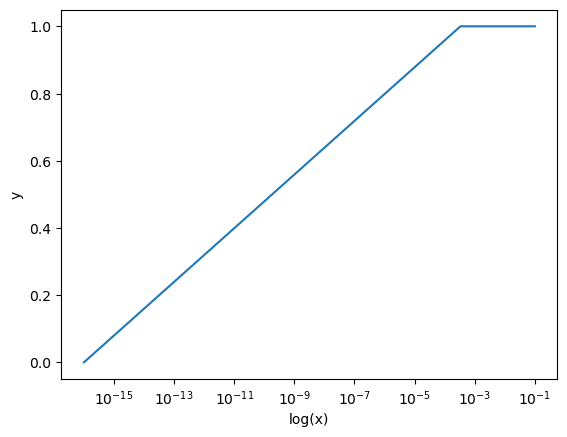

In [10]:
import numpy as np
from matplotlib import pyplot as pt

x = np.flip(np.linspace(1e-16, 1e-1, 300))
y = np.abs((1 + x - 1) / x)

pt.plot(x, y)
pt.xscale("log")
pt.xlabel("log(x)")
pt.ylabel("y")

## 5. Cancelamento catastrófico 2

Vamos calcular a raiz de um polinômio do segundo grau $$ax^2 + bx + c = 0$$ usando a famosa fórmula $$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Escreva uma função que recebe $a, b, c$ e retorna uma lista ou vetor com os valores das 2 raízes (o primeiro valor é a raiz maior (+), o segundo a raiz menor).

In [11]:
def second_degree_polynomial(a: float, b: float, c: float) -> list[float, float]:
    sqrt_delta = np.sqrt(b**2 - 4 * a * c)
    x_1 = (- b + sqrt_delta) / 2 * a
    x_2 = (- b - sqrt_delta) / 2 * a

    return sorted([x_1, x_2], reverse=True)

Agora tente com estes valores, e cheque os resultados (i.e. confira se eles de fato são raízes da equação). Explique o que aconteceu!

In [12]:
second_degree_polynomial(1e6, -1e-5, -1e-5)

[3162282.660172332, -3162272.6601723325]

In [13]:
second_degree_polynomial(1e6, -1e-5, -2e-5)

[4472140.955002375, -4472130.955002375]

## Mais erros com operações

Dada a sequência definida por

$$ x_{n+1} = \begin{cases}
    2 x_n &\text{ se } x_n \in [0; \frac{1}{2}] \\
    2 x_n - 1 &\text{ se } x_n \in (\frac{1}{2}; 1]
    \end{cases}
$$
e $x_0 = \frac{1}{10}$.

1. Calcule exatamente (ou seja, **à mão**) os 10 primeiros termos da sequência. O que acontece daí em diante?
2. Agora escreva código que calcula e imprime 50 termos da sequência. O que acontece? Por quê?

- R(1): Uma dízima periódica.
- R(2): Uma dízima periódica que depois converge para 1 devido aos erros das operações.

In [ ]:
def seq_n(x_0: float, n: 

In [ ]:
int) -> float:
    sequence = [x_0]

    for i in range(n):
        x = sequence[len(sequence) - 1]
        if 0 <= x <= 1 / 2:
            sequence.append(2 * x)
        elif 1 / 2 < x <= 1:
            sequence.append(2 * x - 1)
        else:
            break

    return sequence

In [15]:
x = 1 / 10
n = 55

In [16]:
seq_n(x, n)

[0.1,
 0.2,
 0.4,
 0.8,
 0.6000000000000001,
 0.20000000000000018,
 0.40000000000000036,
 0.8000000000000007,
 0.6000000000000014,
 0.20000000000000284,
 0.4000000000000057,
 0.8000000000000114,
 0.6000000000000227,
 0.20000000000004547,
 0.40000000000009095,
 0.8000000000001819,
 0.6000000000003638,
 0.2000000000007276,
 0.4000000000014552,
 0.8000000000029104,
 0.6000000000058208,
 0.20000000001164153,
 0.40000000002328306,
 0.8000000000465661,
 0.6000000000931323,
 0.20000000018626451,
 0.40000000037252903,
 0.8000000007450581,
 0.6000000014901161,
 0.20000000298023224,
 0.4000000059604645,
 0.800000011920929,
 0.6000000238418579,
 0.20000004768371582,
 0.40000009536743164,
 0.8000001907348633,
 0.6000003814697266,
 0.20000076293945312,
 0.40000152587890625,
 0.8000030517578125,
 0.600006103515625,
 0.20001220703125,
 0.4000244140625,
 0.800048828125,
 0.60009765625,
 0.2001953125,
 0.400390625,
 0.80078125,
 0.6015625,
 0.203125,
 0.40625,
 0.8125,
 0.625,
 0.25,
 0.5,
 1.0]

## Erros de arredondamento *vs* de truncamento

Vamos calcular aproximações para o número $e$ (disponível como `np.e` no `numpy`) usando o limite fundamental:

$$ \lim_{n\rightarrow \infty} \left(1 + \frac{1}{n}\right)^n = e$$

1. Calcule essa expressão pra valores de $n$ entre 1 e 20, e plote o *erro relativo* do valor obtido em função de $n$. Qual é a razão de não obtermos uma precisão melhor?

- R(1): A representação computacional não permite aproximações melhores.

Text(0.5, 0, 'n')

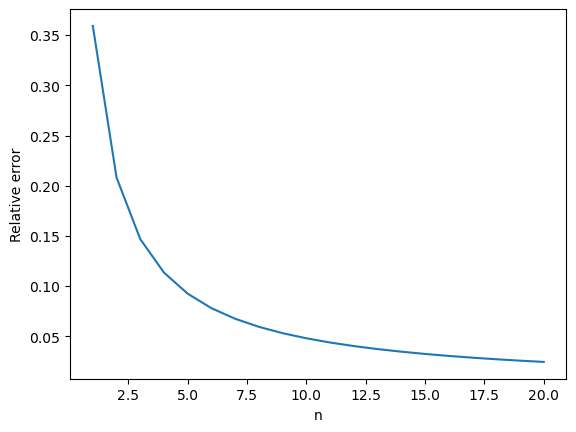

In [17]:
n = np.arange(1, 21)
e = (1 + 1 / n) ** n
error = np.abs((np.e - e) / e)

pt.plot(n, error)
pt.ylabel("Relative error")
pt.xlabel("n")

2. Repita o cálculo e o plot, mas agora variando $n$ em potências de 10, de $10^1$ até $10^{16}$ (use escala logarítmica no eixo $x$ para visualizar melhor). O que aconteceu? Por quê?

- R(2): Quando $n$ é muito grande, os problemas de precisão numérica começam a dominar, levando a um aumento do erro relativo, apesar do aumento na precisão teórica da expressão.

Text(0.5, 0, 'n')

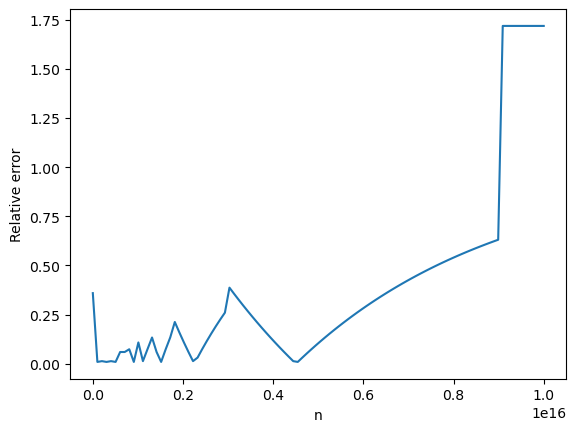

In [18]:
n = np.linspace(1e0, 1e16, 100)
e = (1 + 1 / n) ** n
error = np.abs((np.e - e) / e)

pt.plot(n, error)
pt.ylabel("Relative error")
pt.xlabel("n")